1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

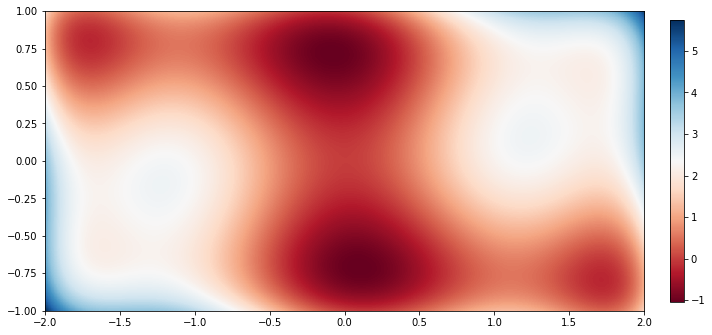

In [1]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
from scipy import optimize

def camelback(x):
  return (((4-2.1*x[0]**2+x[0]**4/3)*x[0]**2)+x[0]*x[1]+(4*x[1]**2-4)*x[1]**2)


x = np.arange(-2,2,0.01)
y = np.arange(-1,1,0.01)

X, Y = np.meshgrid(x, y)

Z = camelback([X, Y])


fig, ax = plt.subplots(figsize=(10,10))

im=ax.imshow(Z, cmap=pylab.cm.RdBu, extent=[-2.0,2.0,-1.0,1.0], origin='lower')

plt.colorbar(im, fraction=0.022, pad=0.04)
fig.tight_layout()

In [2]:
# There should be 2 global minima
first_minima_x0 = (0,-0.75)
first_minima_bounds = [(-0.25,0.25),(-1,-0.5)]
first_minima = optimize.minimize(camelback, first_minima_x0, bounds=first_minima_bounds, tol=10**-8)

print(f"First global minimum: {first_minima}")
print('#'*60)
second_minima_x0 = (0, 0.75)
second_minima_bounds = [(-0.25,0.25),(0.5,1)]
second_minima = optimize.minimize(camelback, second_minima_x0, bounds=second_minima_bounds, tol=10**-8)

print(f"Second global minimum: {second_minima}")
print('#'*60)
initial_guess = (0, 0)
initial_guess_resuld = optimize.minimize(camelback, initial_guess)

print(f"Initial Result: {initial_guess_resuld}")

First global minimum:       fun: -1.0316284534897995
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.04360964e-06,  4.44089210e-08])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 21
      nit: 5
   status: 0
  success: True
        x: array([ 0.08984187, -0.7126564 ])
############################################################
Second global minimum:       fun: -1.031628453489809
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.04360964e-06, -2.22044605e-08])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 21
      nit: 5
   status: 0
  success: True
        x: array([-0.08984188,  0.71265639])
############################################################
Initial Result:       fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ 5.96046448e-08, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

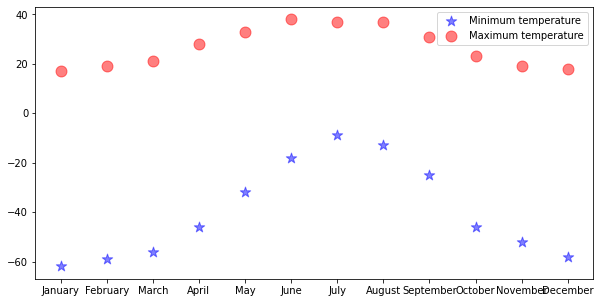

In [3]:
max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = ['January', 'February' , 'March'    , 'April'   , 'May'     , 'June',
          'July'   , 'August'   , 'September', 'October' , 'November', 'December']

plt.figure(figsize=(10, 5))
plt.scatter(months, min, s=120, c='b', marker="*", label='Minimum temperature', alpha=0.5)
plt.scatter(months, max, s=120, c='r', marker="o", label='Maximum temperature', alpha=0.5)
plt.legend();
plt.show()

MIN:
------------------------------------------------------------
Parameters : [52.64929348  6.16452592  1.97590049 61.32094073]

Covariance Matrix:
[[ 1.96936651e+00 -8.73506449e-04  2.27190704e-02  1.05131042e+00]
 [-8.73506449e-04  2.22850199e-03 -4.92555971e-05 -1.09102095e-03]
 [ 2.27190704e-02 -4.92555971e-05  5.77330172e-03  7.06524703e-02]
 [ 1.05131042e+00 -1.09102095e-03  7.06524703e-02  1.41331613e+00]]
################################################################################

MAX:
------------------------------------------------------------
Parameters: [ 23.09208673   5.73581634   2.29443582 -15.77931913]

Covariance Matrix: 
[[ 1.32861386e+00 -1.60400353e-03  1.01470734e-01  1.08333053e+00]
 [-1.60400353e-03  6.31511608e-03 -2.12204122e-04 -1.91621395e-03]
 [ 1.01470734e-01 -2.12204122e-04  2.75427275e-02  1.70924137e-01]
 [ 1.08333053e+00 -1.91621395e-03  1.70924137e-01  1.38424471e+00]]
##############################################################################

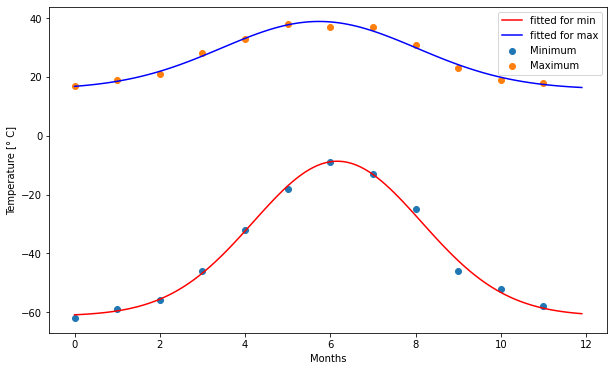

In [4]:
# using shift guasian for fitting data
def shift_guasian(x, const, mu, sigma,S):
    return const * np.exp(-0.5*(x-mu)**2/sigma**2)-S

popt_min, pcov_min = optimize.curve_fit(shift_guasian, np.arange(len(min)), min, p0=[60,7,2,60], full_output=False)
print('MIN:')
print('-'*60)
print(f"Parameters : {popt_min}\n")
print(f"Covariance Matrix:\n{pcov_min}")
print('#'*80)
popt_max, pcov_max = optimize.curve_fit(shift_guasian, np.arange(len(max)), max, p0=[20,7,3,19], full_output=False)
print('\nMAX:')
print('-'*60)
print(f"Parameters: {popt_max}\n")
print(f"Covariance Matrix: \n{pcov_max}")
print('#'*80 , '\n')
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(min)), min, label='Minimum')
plt.scatter(np.arange(len(min)), max, label='Maximum')

x_label = np.arange(start=0, stop=len(min), step=0.1)
y_label_min = shift_guasian(x_label, popt_min[0], popt_min[1],popt_min[2],popt_min[3])
y_label_max = shift_guasian(x_label, popt_max[0], popt_max[1],popt_max[2],popt_max[3])

plt.plot(x_label, y_label_min, label='fitted for min', c='red')
plt.plot(x_label, y_label_max, label='fitted for max', c='blue')
plt.xlabel("Months")
plt.ylabel("Temperature [\N{DEGREE SIGN} C]")
plt.legend(loc='best')
plt.show()

In [5]:
y_min = shift_guasian(np.arange(len(min)), popt_min[0], popt_min[1],popt_min[2],popt_min[3])
y_max = shift_guasian(np.arange(len(max)), popt_max[0], popt_max[1],popt_max[2],popt_max[3])

ssr_min = np.sum((min - y_min)**2)
tss_min = np.sum((np.mean(min) - min)**2)
rsq_min = 1 - ssr_min / tss_min
print("For Minimum RSQ=",rsq_min)

ssr_max = np.sum((max - y_max)**2)
tss_max = np.sum((np.mean(max) - max)**2)
rsq_max = 1 - ssr_max / tss_max
print("For Maximum RSQ=",rsq_max)

print("\n Fir seems word properly")

For Minimum RSQ= 0.9946041936397159
For Maximum RSQ= 0.9858796078359658

 Fir seems word properly


3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [6]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

--2022-01-21 22:23:27--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2022-01-21 22:23:28--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc36b4b4c6bd5a3e866e9c503627.dl.dropboxusercontent.com/cd/0/inline/BePSsIzXiYAzb6QoaHxFoW3-iL_6ij5BbqC0QOtKcrEboXq8b7Lg-M5z5a6-YUIFTcfn3tM-nXvU7m849LDT8xE0QsH6SgEbH00DgyzRDaxf8a9Xr7zcgIlouNisMv8f3FButKK4dMAzgEukEGr2yEXc/file# [following]
--2022-01-21 22:23:28--  https://uc36b4b4c6bd5a3e866e9c503627.dl.dropboxusercontent.com/cd/0/inline/BePSsIzXiYAzb6QoaHxFoW3-iL_6ij5BbqC0QOtKcrEboXq8b7Lg-M5z5a6-YUIFTcfn3tM-nXv

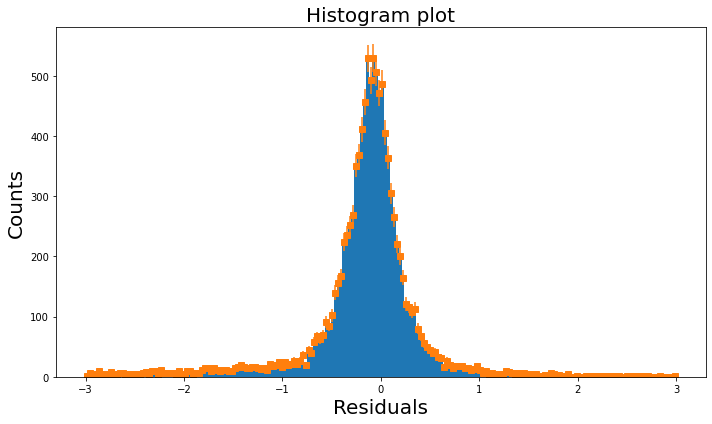

In [7]:
import pickle
import pandas as pd
filename = "data/residuals_261.pkl"

with open(filename, 'rb') as f:
    data = pickle.load(f)

df = pd.DataFrame(dict(data.item()))

# df[abs(df.residuals)<3]

X_lower=-3
X_higher=3

fig, ax = plt.subplots(figsize=(10, 6))

yvalues, bins, _ = plt.hist(df['residuals'], bins=200, range=(X_lower, X_higher), cumulative=False) 
binwidth = bins[1] - bins[0]
bins = bins[:len(bins)-1]

ax.set_title('Histogram plot', fontsize=20)
ax.set_xlabel('Residuals', fontsize=20)
ax.set_ylabel('Counts', fontsize=20)

ax.errorbar(bins + binwidth/2, yvalues, yerr=np.sqrt(yvalues), marker='s', linestyle='None')
fig.tight_layout()


Parameters:
 [ 4.85267079e+02 -8.69473800e-02  2.25076158e-01]


Covariance Matrix:
 [[ 3.18006498e+01  1.43815730e-10 -9.83294930e-03]
 [ 1.43815730e-10  9.12121896e-06 -2.33971332e-14]
 [-9.83294930e-03 -2.33971332e-14  9.12121866e-06]]


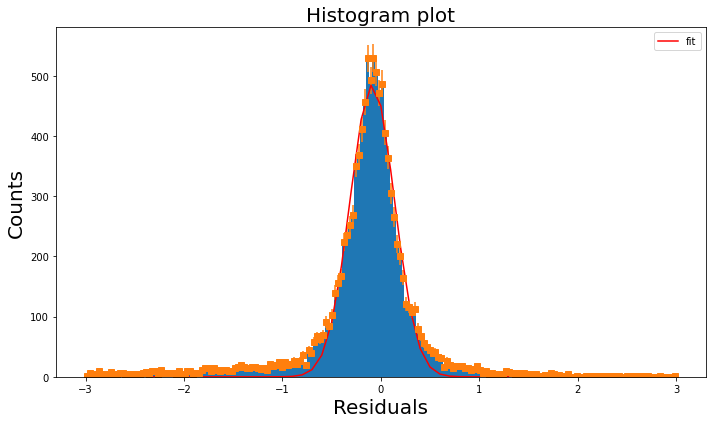

In [19]:
# gaus_definition
def gaus(x, const, mu, sigma):
    return const * np.exp(-0.5*(x-mu)**2/sigma**2)


popt_r, pcov_r = optimize.curve_fit(gaus, bins+binwidth/2, yvalues, p0=[500,0,1], full_output=False)
print("\nParameters:\n", popt_r)
print("\n\nCovariance Matrix:\n", pcov_r)

fig, ax = plt.subplots(figsize=(10, 6))

yvalues, bins, _ = plt.hist(df['residuals'], bins=200, range=(X_lower, X_higher), cumulative=False) 
binwidth = bins[1] - bins[0]
bins = bins[:len(bins)-1]

ax.set_title('Histogram plot', fontsize=20)
ax.set_xlabel('Residuals', fontsize=20)
ax.set_ylabel('Counts', fontsize=20)

ax.errorbar(bins+binwidth/2, yvalues, yerr=np.sqrt(yvalues), marker='s', linestyle='None')
ax.plot(np.arange(start=X_lower,stop=X_higher,step=0.1), gaus(np.arange(start=X_lower,stop=X_higher,step=0.1), popt_r[0], popt_r[1],popt_r[2]), label='fit',c='red')
ax.legend(loc='best')
fig.tight_layout()

In [10]:
from scipy import stats
data = pd.DataFrame()
data['left_bins'] = np.linspace(X_lower, X_higher, 200)
data['fit'] = gaus(np.linspace(X_lower, X_higher, 200), popt_r[0], popt_r[1],popt_r[2])
data['experimental'] = yvalues

data = data[data['experimental']>0.9]
# fit = gaus(np.linspace(X_lower, X_highe, 200), popt_r[0], popt_r[1],popt_r[2])

ndof = len(data.experimental) - 1
chi2 = np.sum(((data.experimental- data.fit)**2) /(data.experimental))
print(f"chi2 = {chi2}", )

pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print(f"p-value ={pvalue}", ) 
print("Fit unsatisfactory")

chi2 = 1558.2068642339693
p-value =0.0
Fit unsatisfactory


4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [ ]:
!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt

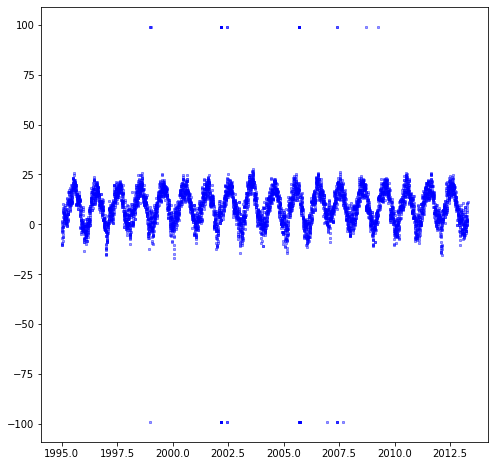

In [12]:
import numpy as np
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

filename = "/content/munich_temperatures_average_with_bad_data.txt"
data=np.loadtxt(filename)
t=data.T[0]
y=data.T[1]

fig = plt.figure(figsize=(8, 8))
# fig.set_dpi(100)
plt.scatter(t, y, s=2, c='b', marker="s", label='data',alpha=0.4)

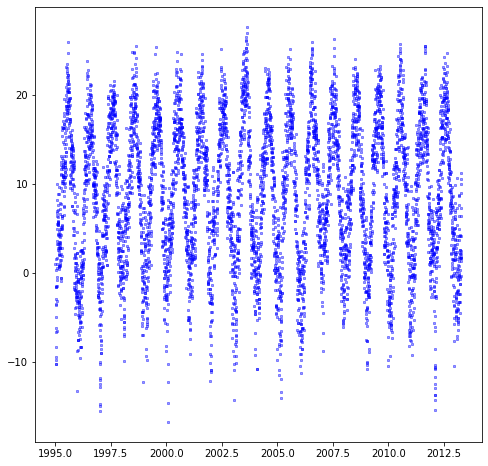

In [13]:
b = np.ma.masked_outside(y, -90, 90).mask
t = t[~b]
y = y[~b]

fig = plt.figure(figsize=(8, 8))
plt.scatter(t, y, s=2, c='b', marker="s", label='data',alpha=0.4)

In [14]:
def fit_func(x, a, b, c):
    return a*np.cos(2*np.pi * x + b) + c

fit_par, fit_cov = optimize.curve_fit(fit_func, t, y, p0=[9,3,12], full_output=False)
print("parameters:\n", fit_par)
print('\n', '#'*50, '\n')
print("covariance matrix:\n", fit_cov)

parameters:
 [9.95518356 2.88862794 9.04084545]

 ################################################## 

covariance matrix:
 [[ 4.33827111e-03  2.06703336e-06  4.67784579e-05]
 [ 2.06703336e-06  4.42924432e-05 -2.58453853e-06]
 [ 4.67784579e-05 -2.58453853e-06  2.18211979e-03]]


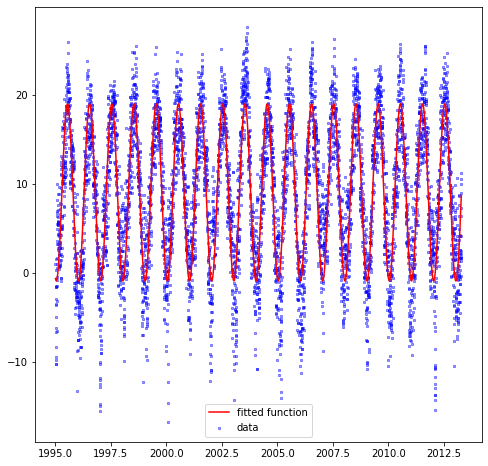

In [15]:
fig = plt.figure(figsize=(8, 8))


plt.scatter(t, y, s=2, c='b', marker="s", label='data', alpha=0.4)
plt.plot(t, fit_func(t, fit_par[0], fit_par[1],fit_par[2]), label='fitted function',color='red')
plt.legend()
# ax1.set_xlim([2008,2012])
plt.show()

parameters:
 [9.95538333 0.99976014 5.90922308 9.03978538]

 ################################################## 

covariance matrix:
 [[ 4.34387737e-03  4.89690104e-07 -6.16423298e-03  4.84906708e-05]
 [ 4.89690104e-07  4.00403570e-08 -5.04199897e-04  1.78114897e-07]
 [-6.16423298e-03 -5.04199897e-04  6.34907698e+00 -2.24541394e-03]
 [ 4.84906708e-05  1.78114897e-07 -2.24541394e-03  2.18275330e-03]]

 ################################################## 



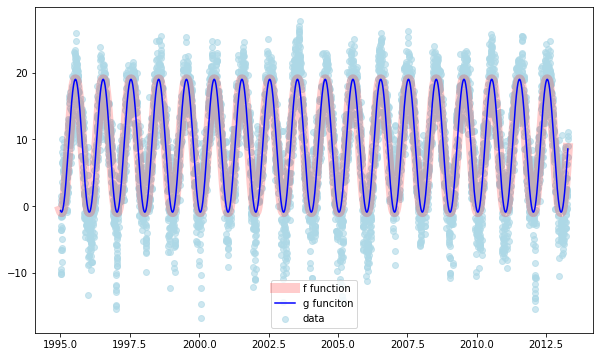

SSR: 95529.06253319702 95508.3374827884
Test f vs g:
CL: 0.231 , additional parameter necessary: NO


In [16]:
from scipy.stats import f


def g(x, a, b, c, d):
    return a*np.cos(2*np.pi *b* x + c)+d

new_fit_par, new_fit_cov = optimize.curve_fit(g, t, y, p0=[9,1,3,9], full_output=False)
print("parameters:\n", new_fit_par)
print('\n', '#'*50, '\n')
print("covariance matrix:\n", new_fit_cov)
print('\n', '#'*50, '\n')

def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL


y1 = fit_func(t, fit_par[0], fit_par[1], fit_par[2])
y2 = g(t, new_fit_par[0], new_fit_par[1], new_fit_par[2], new_fit_par[3])
fig, ax = plt.subplots(figsize=(10, 6)) # create the figure and the axes

ax.scatter(x=t, y=y, marker='o', c='lightblue', label="data",alpha=0.6)

ax.plot(t, y1, color='r', lw=10,label="f function",alpha=0.2)
ssr_1 = np.sum((y1 - y)**2)

ax.plot(t, y2, color='b', label="g funciton",alpha=1)
ssr_2 = np.sum((y2 - y)**2)


ax.legend()
plt.show()
print("SSR:", ssr_1, ssr_2)

print("Test f vs g:")
cl_1_vs_2 = Ftest(ssr_1, ssr_2, 1, 2, t.size, verbose=True)